### Will they Donate?
**Anusha Kankipati, Anagha Nair**   

Loading and Configuring Dataset

In [163]:
import numpy as np

def loaddata(filename):
    # Load the data from the file, assuming no missing values and header is skipped
    data = np.genfromtxt(filename, delimiter=',', skip_header=1)
    n = len(data[0])

    # Split into features (X) and target (y)
    X = data[:, :(n-1)]  # First n-1 columns
    y = data[:, -1]  # Last column
    return X, y

def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Perform Z-score normalization: (X - mean) / std
    X_normalized = (X - mean) / std
    
    ones_column = np.ones((X_normalized.shape[0], 1))
    X_normalized_withbias = np.hstack((X_normalized, ones_column))
    return X_normalized_withbias

def split_data(X, y, train_size=0.8, random_state=None):
    # Set random seed for reproducibility
    # if random_state is not None:
    #     np.random.seed(random_state)
    
    # Concatenate X and y to ensure shuffling keeps them aligned
    data = np.hstack((X, y.reshape(-1, 1)))
    np.random.shuffle(data)
    
    # Split shuffled data back into X and y
    X_shuffled, y_shuffled = data[:, :-1], data[:, -1]
    
    # Determine the split index
    split_idx = int(train_size * len(X_shuffled))
    
    # Split data into training and testing sets
    X_train, X_test = X_shuffled[:split_idx], X_shuffled[split_idx:]
    y_train, y_test = y_shuffled[:split_idx], y_shuffled[split_idx:]
    
    return X_train, X_test, y_train, y_test

# Load the data
X, y = loaddata('transfusion.data')
X_norm = normalize(X)     # A key step

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(X_norm, y, random_state=42)

# Print shapes for confirmation
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)


#### Logistic Regression

In [81]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

def accuracyScore(predictions, labels):
    # print(labels.shape)
    n = len(labels)
    if len(predictions) != n:
        print("something's wrong, mismatched lengths")
        print(n, "is not", len(predictions))
        return
    correct = 0
    for i in range(n):
        if predictions[i] == labels[i]:
            correct = correct+1
    return correct / n



print(classification_report(y_test, y_pred))
print(f"Logistic Regression Test Accuracy: {accuracyScore(y_pred, y_test)}")

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       136
         1.0       1.00      0.07      0.13        14

    accuracy                           0.91       150
   macro avg       0.96      0.54      0.54       150
weighted avg       0.92      0.91      0.88       150

Logistic Regression Test Accuracy: 0.9133333333333333


Creating and displaying confusion matrix

In [67]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 427.9555555555555, 'Predicted label')

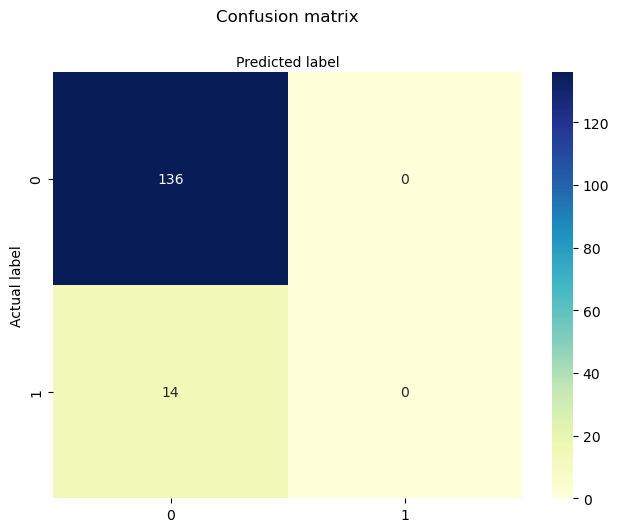

In [68]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



#### LDA and QDA
Using PCA to remove collinearity

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
def train_lda_classifier(X, y):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    return lda

def train_qda_classifier(X, y):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    return qda


def reduce_dimensionality(X, n_components=None):
    # Reduce the dimensionality of the data to avoid collinearity issues
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced

# Apply PCA to your training and testing data
X_train_reduced = reduce_dimensionality(X_train, n_components=2)  # 1 or 2 components maximizes test accuracy 
X_test_reduced = reduce_dimensionality(X_test, n_components=2)

lda = train_lda_classifier(X_train_reduced, y_train)
qda = train_qda_classifier(X_train_reduced, y_train)

print("LDA Training Acc", lda.score(X_train_reduced, y_train))
print("LDA Test Acc", lda.score(X_test_reduced, y_test))

print("QDA Training Acc", qda.score(X_train_reduced, y_train))
print("QDA Test Acc", qda.score(X_test_reduced, y_test))


LDA Training Acc 0.725752508361204
LDA Test Acc 0.9066666666666666
QDA Training Acc 0.725752508361204
QDA Test Acc 0.9066666666666666


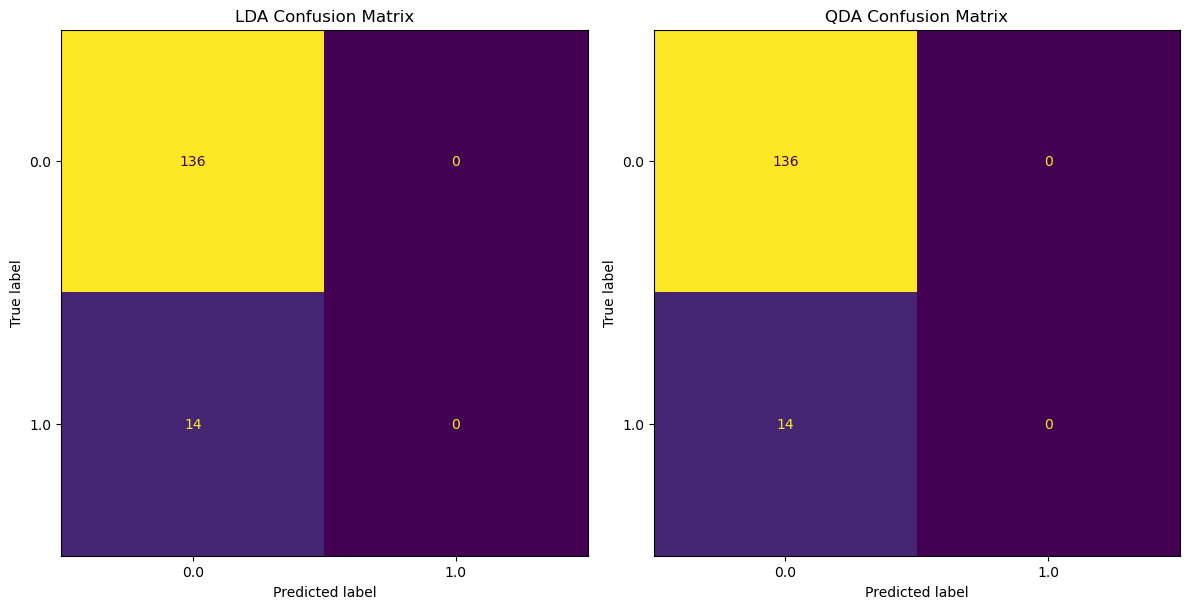

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels for the test set
lda_preds = lda.predict(X_test_reduced)
qda_preds = qda.predict(X_test_reduced)

# Generate confusion matrices
lda_cm = confusion_matrix(y_test, lda_preds)
qda_cm = confusion_matrix(y_test, qda_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(lda_cm, display_labels=lda.classes_).plot(ax=axes[0], colorbar=False)
axes[0].set_title('LDA Confusion Matrix')

ConfusionMatrixDisplay(qda_cm, display_labels=qda.classes_).plot(ax=axes[1], colorbar=False)
axes[1].set_title('QDA Confusion Matrix')

plt.tight_layout()
plt.show()


Accuracy Score: 90.6% 
True Negative=136
False Negative=14

### Augmenting the Dataset
Repeating the above classifiers with the augmented dataset, containing 4 extra features. <br>
Feature 1=0.5×Recency (months)+0.3×Frequency (times)−0.2×Time (months) <br>
Feature 2=0.7×Frequency (times)−0.4×Monetary (c.c. blood)+0.2×Time (months) <br>
Feature 3=0.6×Recency (months)+0.5×Monetary (c.c. blood)−0.3×Frequency (times) <br>
Feature 4=−0.5×Recency (months)+0.4×Time (months)+0.3×Frequency (times)

In [71]:
# Load the data
X_augmented, y_augmented = loaddata('augmented_data.csv')
X_norm_augmented = normalize(X)

# Split the data into training and testing sets
X_train_augmented, X_test_augmented, y_train_augmented, y_test_augmented = split_data(X_norm_augmented, y_augmented)

Logistic Regression Test Accuracy: 0.9066666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

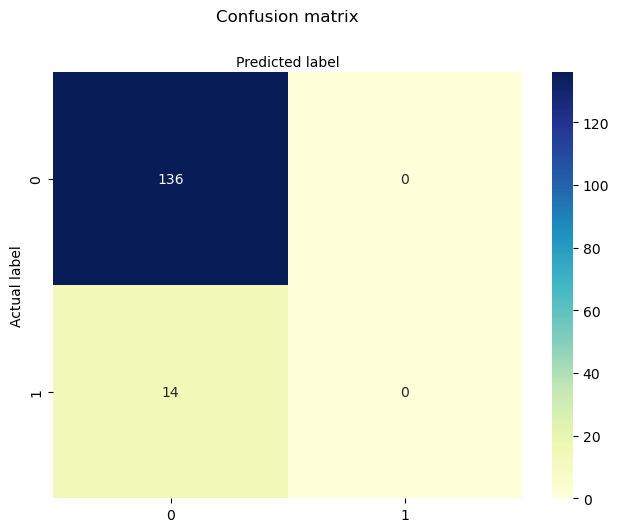

In [72]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_augmented, y_train_augmented)

y_pred = logreg.predict(X_test_augmented)
print(f"Logistic Regression Test Accuracy: {accuracyScore(y_pred, y_test)}")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [73]:
X_train_reduced = reduce_dimensionality(X_train_augmented, n_components=2)  # 1 or 2 components maximizes test accuracy 
X_test_reduced = reduce_dimensionality(X_test_augmented, n_components=2)

lda = train_lda_classifier(X_train_reduced, y_train_augmented)
qda = train_qda_classifier(X_train_reduced, y_train_augmented)

print("LDA Training Acc", lda.score(X_train_reduced, y_train_augmented))
print("LDA Test Acc", lda.score(X_test_reduced, y_test_augmented))

print("QDA Training Acc", qda.score(X_train_reduced, y_train_augmented))
print("QDA Test Acc", qda.score(X_test_reduced, y_test_augmented))


LDA Training Acc 0.725752508361204
LDA Test Acc 0.9066666666666666
QDA Training Acc 0.725752508361204
QDA Test Acc 0.9066666666666666


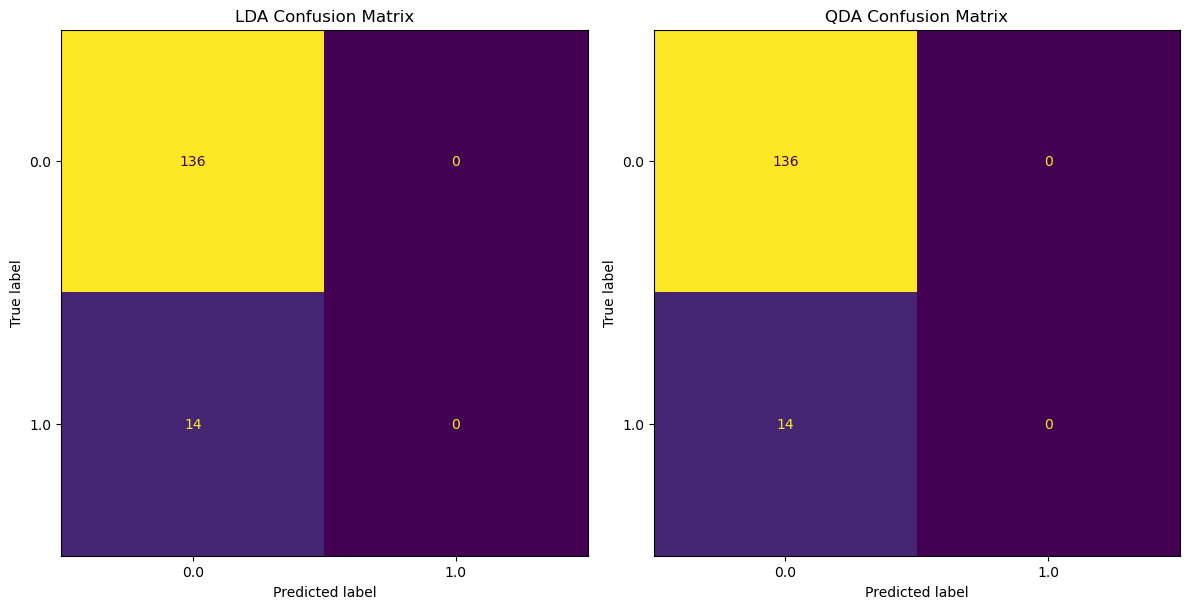

In [74]:
# Predict class labels for the test set
lda_preds = lda.predict(X_test_reduced)
qda_preds = qda.predict(X_test_reduced)

# Generate confusion matrices
lda_cm = confusion_matrix(y_test, lda_preds)
qda_cm = confusion_matrix(y_test, qda_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(lda_cm, display_labels=lda.classes_).plot(ax=axes[0], colorbar=False)
axes[0].set_title('LDA Confusion Matrix')

ConfusionMatrixDisplay(qda_cm, display_labels=qda.classes_).plot(ax=axes[1], colorbar=False)
axes[1].set_title('QDA Confusion Matrix')

plt.tight_layout()
plt.show()


In [76]:
print(lda_preds)
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [170]:


from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
class_weight_range = np.arange(1.2, 2.5, 0.05)
results = {}
for weight in class_weight_range:
    accuracies = []
    for run in range(10):
        # Split the data
        
        # Define class weights
        class_weights = {0: 1, 1: weight}
        
        # Initialize and train the model
        clf = LogisticRegression(class_weight=class_weights, random_state=4)
        clf.fit(X_train_augmented, y_train_augmented)
        
        # Predict and calculate accuracy
        y_pred = clf.predict(X_test_augmented)
        acc = accuracy_score(y_test_augmented, y_pred)
        accuracies.append(acc)
    
    # Average accuracy for the current weight
    avg_accuracy = np.mean(accuracies)
    # print(accuracies)
    results[weight] = avg_accuracy
    print(f"Logistic Regression Test Accuracy: {accuracyScore(y_pred, y_test_augmented)}")
    print(f"Class Weight 1: {weight:.1f}, Average Accuracy: {avg_accuracy:.4f}")

# Print the best-performing weight
best_weight = max(results, key=results.get)
print(f"\nBest Class Weight for 1: {best_weight:.1f} with Average Accuracy: {results[best_weight]:.4f}")

Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.2, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.2, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.3, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.4, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.4, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.5, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.5, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.6, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.6, Average Accuracy: 0.9067
Logistic Regression Test Accuracy: 0.9066666666666666
Class Weight 1: 1.7, Average Accuracy: 0.9067


Accuracy Score: 90.6% 
QDA accuracy reduced to 89.3%

True Negative=136
False Negative=14



**Without Normalization**
QDA reduce to 88.6%